## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.052431  0.335432  1.383542 -1.583339 -1.736026 -1.539053
1  1.405782 -0.381645  0.062985 -0.323530  1.223650  0.567642
2 -1.374708  1.080778  0.483962  1.304078  1.534075  0.510266
3 -0.885228  0.404392  1.060910 -0.762978  0.324948 -0.517727
4 -1.373896 -1.289840  1.185718 -1.120426 -1.047736 -1.890917


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9786278	total: 69.6ms	remaining: 1m 9s
1:	learn: 0.9677198	total: 70.3ms	remaining: 35.1s
2:	learn: 0.9580897	total: 71ms	remaining: 23.6s
3:	learn: 0.9485339	total: 71.5ms	remaining: 17.8s
4:	learn: 0.9385049	total: 72.1ms	remaining: 14.3s
5:	learn: 0.9285228	total: 72.6ms	remaining: 12s
6:	learn: 0.9175221	total: 73.1ms	remaining: 10.4s
7:	learn: 0.9099776	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9005854	total: 74.1ms	remaining: 8.16s
9:	learn: 0.8915072	total: 74.6ms	remaining: 7.39s
10:	learn: 0.8833811	total: 75.2ms	remaining: 6.76s
11:	learn: 0.8727310	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8639037	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8558604	total: 76.8ms	remaining: 5.41s
14:	learn: 0.8487761	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8406654	total: 77.9ms	remaining: 4.79s
16:	learn: 0.8327642	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8252093	total: 78.7ms	remaining: 4.29s
18:	learn: 0.8173384	total: 79.2ms	remaining: 4.

84:	learn: 0.4528982	total: 109ms	remaining: 1.18s
85:	learn: 0.4491542	total: 110ms	remaining: 1.17s
86:	learn: 0.4458011	total: 110ms	remaining: 1.16s
87:	learn: 0.4421848	total: 111ms	remaining: 1.15s
88:	learn: 0.4387848	total: 111ms	remaining: 1.14s
89:	learn: 0.4356933	total: 112ms	remaining: 1.13s
90:	learn: 0.4322232	total: 112ms	remaining: 1.12s
91:	learn: 0.4290600	total: 113ms	remaining: 1.11s
92:	learn: 0.4256487	total: 113ms	remaining: 1.1s
93:	learn: 0.4217862	total: 113ms	remaining: 1.09s
94:	learn: 0.4190402	total: 114ms	remaining: 1.08s
95:	learn: 0.4159041	total: 114ms	remaining: 1.08s
96:	learn: 0.4133752	total: 115ms	remaining: 1.07s
97:	learn: 0.4105720	total: 115ms	remaining: 1.06s
98:	learn: 0.4079124	total: 116ms	remaining: 1.05s
99:	learn: 0.4057635	total: 116ms	remaining: 1.04s
100:	learn: 0.4023711	total: 116ms	remaining: 1.03s
101:	learn: 0.3986333	total: 117ms	remaining: 1.03s
102:	learn: 0.3959089	total: 117ms	remaining: 1.02s
103:	learn: 0.3934582	total: 

252:	learn: 0.1529662	total: 188ms	remaining: 554ms
253:	learn: 0.1521952	total: 188ms	remaining: 553ms
254:	learn: 0.1514241	total: 189ms	remaining: 552ms
255:	learn: 0.1504222	total: 189ms	remaining: 550ms
256:	learn: 0.1496175	total: 190ms	remaining: 549ms
257:	learn: 0.1486282	total: 190ms	remaining: 547ms
258:	learn: 0.1476002	total: 191ms	remaining: 545ms
259:	learn: 0.1467589	total: 191ms	remaining: 544ms
260:	learn: 0.1457840	total: 192ms	remaining: 542ms
261:	learn: 0.1450639	total: 192ms	remaining: 541ms
262:	learn: 0.1440230	total: 192ms	remaining: 539ms
263:	learn: 0.1433035	total: 193ms	remaining: 537ms
264:	learn: 0.1423345	total: 193ms	remaining: 536ms
265:	learn: 0.1416628	total: 194ms	remaining: 534ms
266:	learn: 0.1408827	total: 194ms	remaining: 533ms
267:	learn: 0.1401280	total: 195ms	remaining: 532ms
268:	learn: 0.1394063	total: 195ms	remaining: 530ms
269:	learn: 0.1384580	total: 195ms	remaining: 528ms
270:	learn: 0.1376211	total: 196ms	remaining: 527ms
271:	learn: 

470:	learn: 0.0533214	total: 293ms	remaining: 329ms
471:	learn: 0.0531765	total: 294ms	remaining: 328ms
472:	learn: 0.0529863	total: 294ms	remaining: 328ms
473:	learn: 0.0528834	total: 295ms	remaining: 327ms
474:	learn: 0.0527436	total: 295ms	remaining: 326ms
475:	learn: 0.0524088	total: 295ms	remaining: 325ms
476:	learn: 0.0522543	total: 296ms	remaining: 324ms
477:	learn: 0.0521331	total: 296ms	remaining: 324ms
478:	learn: 0.0518059	total: 297ms	remaining: 323ms
479:	learn: 0.0516902	total: 297ms	remaining: 322ms
480:	learn: 0.0513707	total: 298ms	remaining: 321ms
481:	learn: 0.0512536	total: 298ms	remaining: 320ms
482:	learn: 0.0509412	total: 299ms	remaining: 320ms
483:	learn: 0.0508270	total: 299ms	remaining: 319ms
484:	learn: 0.0504998	total: 300ms	remaining: 318ms
485:	learn: 0.0501448	total: 300ms	remaining: 318ms
486:	learn: 0.0500340	total: 301ms	remaining: 317ms
487:	learn: 0.0497191	total: 301ms	remaining: 316ms
488:	learn: 0.0494106	total: 302ms	remaining: 315ms
489:	learn: 

632:	learn: 0.0284741	total: 371ms	remaining: 215ms
633:	learn: 0.0283256	total: 371ms	remaining: 214ms
634:	learn: 0.0282028	total: 372ms	remaining: 214ms
635:	learn: 0.0281660	total: 372ms	remaining: 213ms
636:	learn: 0.0281298	total: 373ms	remaining: 212ms
637:	learn: 0.0279941	total: 373ms	remaining: 212ms
638:	learn: 0.0279587	total: 374ms	remaining: 211ms
639:	learn: 0.0278139	total: 374ms	remaining: 210ms
640:	learn: 0.0277265	total: 374ms	remaining: 210ms
641:	learn: 0.0276917	total: 375ms	remaining: 209ms
642:	learn: 0.0276062	total: 375ms	remaining: 208ms
643:	learn: 0.0275718	total: 375ms	remaining: 208ms
644:	learn: 0.0274744	total: 376ms	remaining: 207ms
645:	learn: 0.0273949	total: 376ms	remaining: 206ms
646:	learn: 0.0273612	total: 377ms	remaining: 206ms
647:	learn: 0.0272556	total: 377ms	remaining: 205ms
648:	learn: 0.0271728	total: 378ms	remaining: 204ms
649:	learn: 0.0271397	total: 378ms	remaining: 204ms
650:	learn: 0.0270803	total: 379ms	remaining: 203ms
651:	learn: 

858:	learn: 0.0145004	total: 476ms	remaining: 78.1ms
859:	learn: 0.0144336	total: 476ms	remaining: 77.6ms
860:	learn: 0.0143951	total: 477ms	remaining: 77ms
861:	learn: 0.0143489	total: 477ms	remaining: 76.4ms
862:	learn: 0.0143021	total: 478ms	remaining: 75.9ms
863:	learn: 0.0142639	total: 478ms	remaining: 75.3ms
864:	learn: 0.0142267	total: 479ms	remaining: 74.7ms
865:	learn: 0.0141819	total: 479ms	remaining: 74.1ms
866:	learn: 0.0141393	total: 479ms	remaining: 73.5ms
867:	learn: 0.0141098	total: 480ms	remaining: 73ms
868:	learn: 0.0140734	total: 480ms	remaining: 72.4ms
869:	learn: 0.0140300	total: 481ms	remaining: 71.9ms
870:	learn: 0.0139906	total: 481ms	remaining: 71.3ms
871:	learn: 0.0139297	total: 482ms	remaining: 70.8ms
872:	learn: 0.0138994	total: 482ms	remaining: 70.2ms
873:	learn: 0.0138698	total: 483ms	remaining: 69.6ms
874:	learn: 0.0138409	total: 483ms	remaining: 69ms
875:	learn: 0.0137817	total: 484ms	remaining: 68.5ms
876:	learn: 0.0137518	total: 484ms	remaining: 67.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

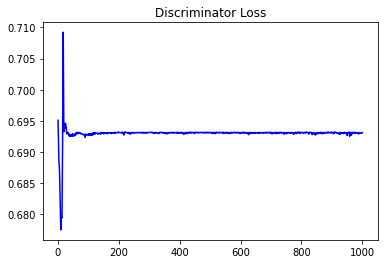

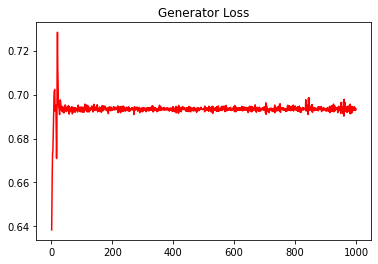

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06072741887658147


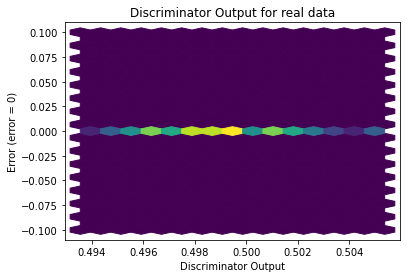

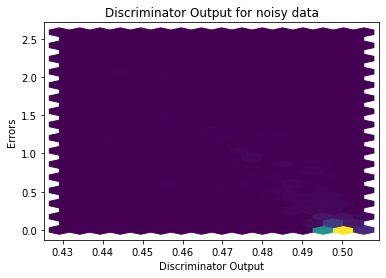

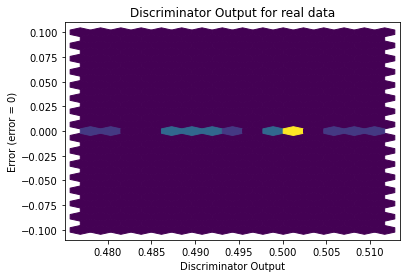

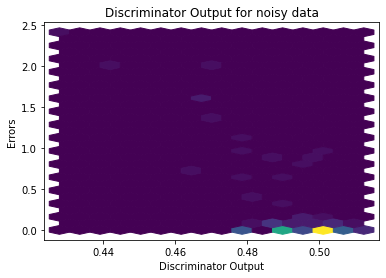

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


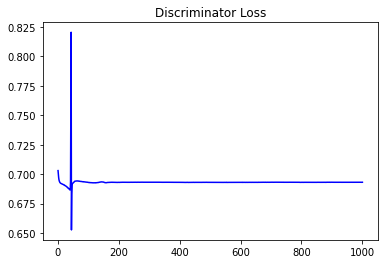

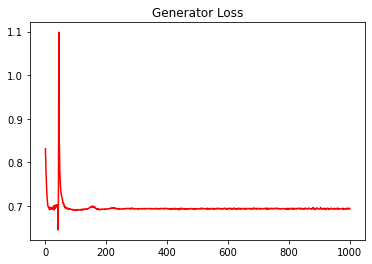

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0964426775326638


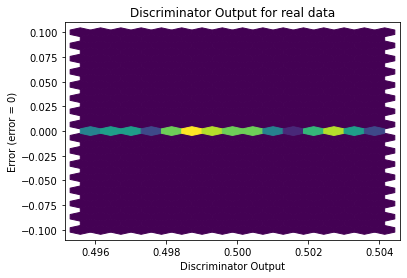

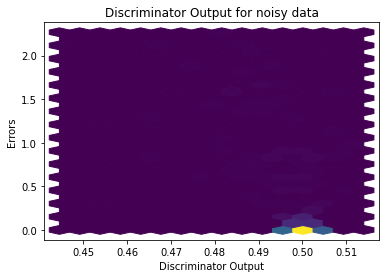

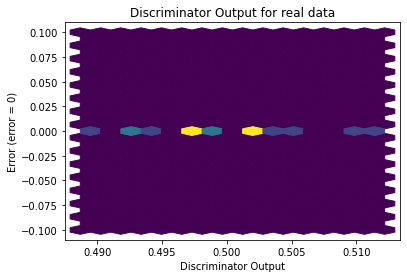

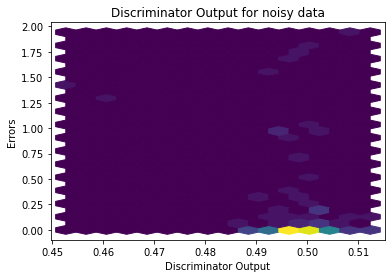

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0195]], requires_grad=True)
